In [1]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# loading dataset
df = pd.read_csv("./spam.tsv", sep="\t")

In [10]:
# shows top 10 head if dataset
df.head(10)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
6,ham,Even my brother is not like to speak with me. ...,77,2
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2


In [11]:
# Implements some basic analysis
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [12]:
df.shape

(5572, 4)

In [13]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

### Dataset Balancing

In [14]:
ham = df[df["label"] == 'ham']
ham.shape

(4825, 4)

In [16]:
spam = df[df["label"] == "spam"]
spam.shape

(747, 4)

In [19]:
ham = df.sample(spam.shape[0])
ham.shape

(747, 4)

In [22]:
data = pd.concat([ham , spam], axis=0, ignore_index=True)
data.shape

(1494, 4)

### Explatory Data Analysis

In [31]:
plt.rcParams["figure.dpi"]=200
plt.rcParams["figure.figsize"] = (10,4)
plt.style.use("ggplot")

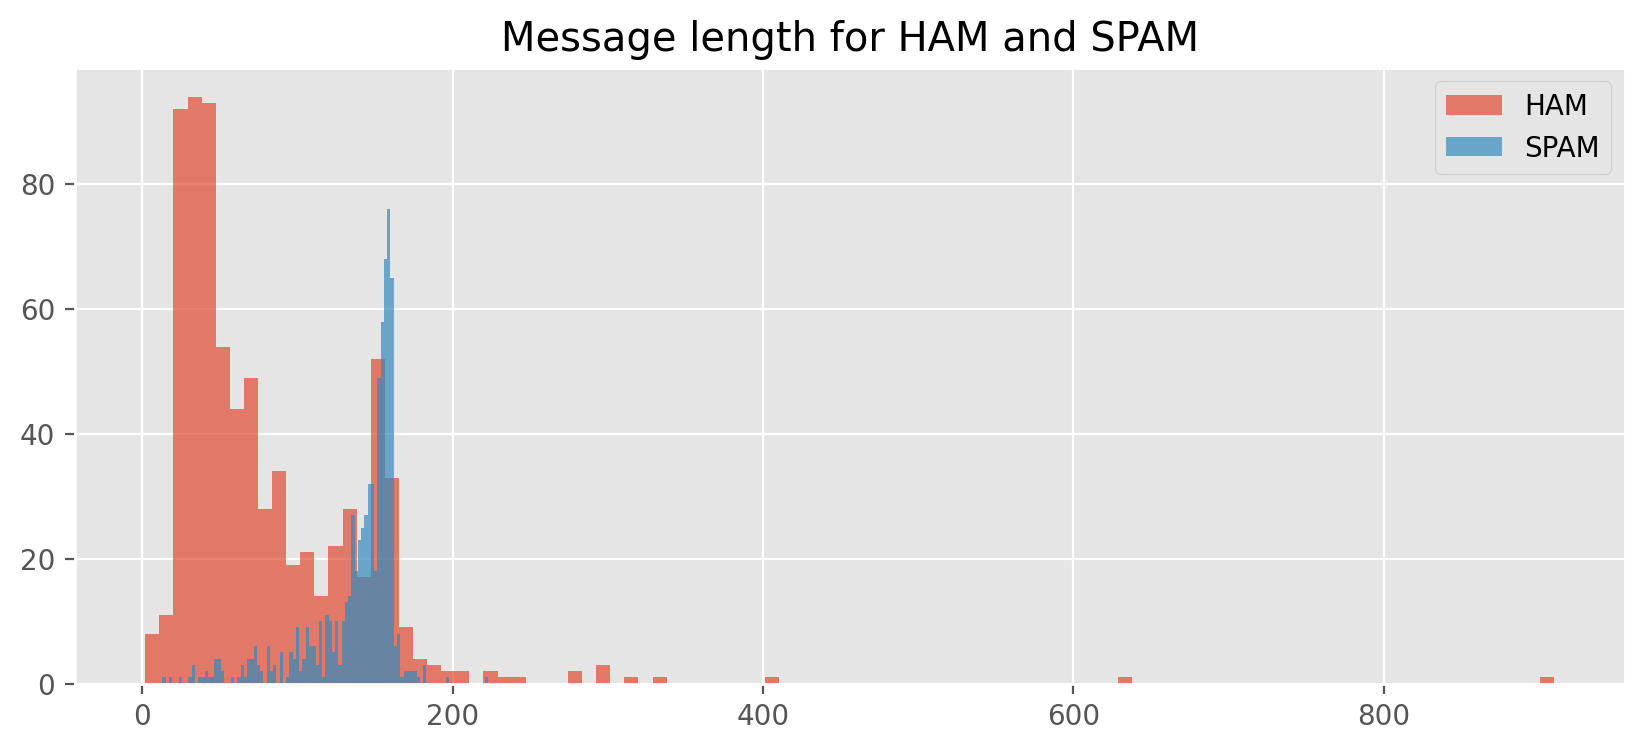

In [32]:
plt.hist(ham['length'], bins=100 , alpha=0.7 , label="HAM")
plt.hist(spam['length'], bins=100, alpha=0.7, label="SPAM")
plt.title("Message length for HAM and SPAM")
plt.legend()
plt.show()

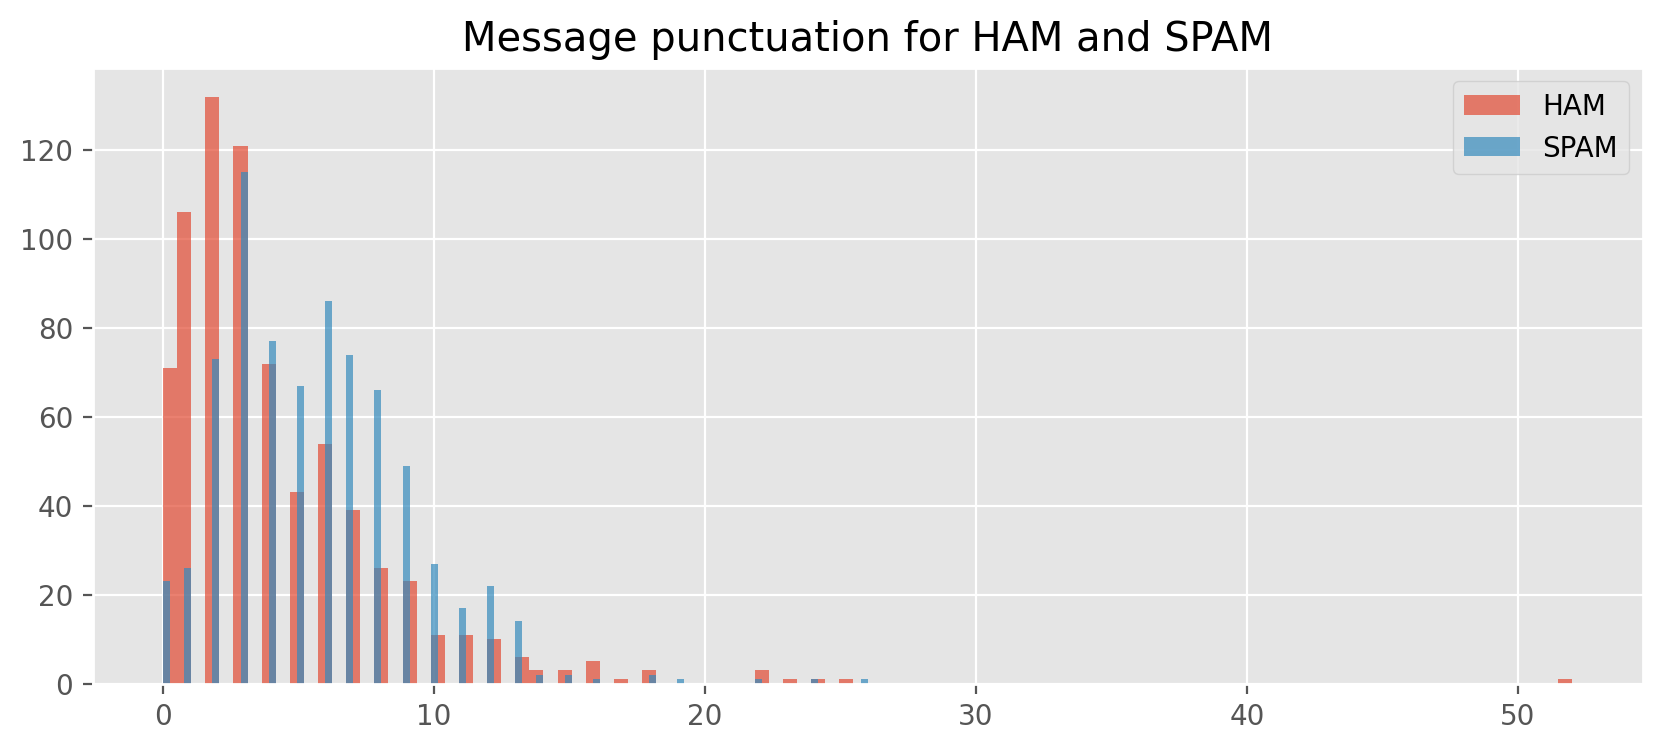

In [33]:
plt.hist(ham['punct'], bins=100, alpha=0.7, label="HAM")
plt.hist(spam['punct'], bins=100, alpha=0.7, label="SPAM")
plt.title("Message punctuation for HAM and SPAM")
plt.legend()
plt.show()

### Data Preparation For Training

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=0, shuffle=True,
                                                   stratify=data['label'])

In [40]:
x_train.shape, x_test.shape

((1195,), (299,))

In [46]:
# model Building
clf = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('rfc', RandomForestClassifier(n_estimators=100,n_jobs=-1))
])
clf.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [47]:
y_pred = clf.predict(x_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       131
        spam       1.00      0.95      0.97       168

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299



In [50]:
clf.predict(['you have won lottery ticket worth $1000, please click here to claim',
            'hi, how are you doing today?'])

array(['spam', 'ham'], dtype=object)

In [51]:
clf.classes_

array(['ham', 'spam'], dtype=object)

### Save and Load Model

In [52]:
import pickle

In [53]:
pickle.dump(clf, open("model.pkl", "wb"))

In [54]:
model = pickle.load(open("model.pkl", "rb"))

In [55]:
model.predict([
    'Limited Time Offer! Get the latest male enhancement pills for 70% off! (This message uses spammy keywords and promotes an unsolicited product.)',
    'Hey Sarah, just checking in! How's your new job going? (This message is from a friend and has a friendly tone.)'
])

SyntaxError: invalid syntax (3463304674.py, line 3)